BARAKAT Khalid

In [0]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
from sklearn.decomposition import PCA

Creation de donné pour tester le code.

In [0]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

Question 1:

In [0]:
def K_means(X,k):
  n = X.shape[0]
  c = X.shape[1]
  mean = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)
  centre = np.random.randn(k,c)*std + mean
  centre_old = np.zeros(centre.shape)
  centre_new = np.copy(centre)

  clusters = np.zeros(n)
  distances = np.zeros((n,k))

  erreur = np.linalg.norm(centre_new - centre_old)

  while erreur != 0:

    for i in range(k):
        distances[:,i] = np.linalg.norm(X - centre[i], axis=1)

    clusters = np.argmin(distances, axis = 1)    
    centre_old = np.copy(centre_new)

    for i in range(k):
        centre_new[i] = np.mean(X[clusters == i], axis=0)

    erreur = np.linalg.norm(centre_new - centre_old)

  plt.scatter(X[:,0], X[:,1])
  plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
  plt.show()



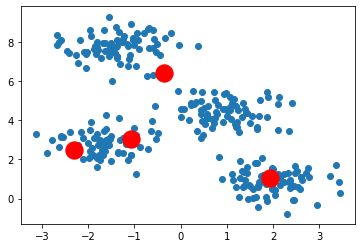

In [0]:
K_means(X,4)

Question 2 et 3:

In [0]:
def K_meanspp(X,K):
  i=rd.randint(0,X.shape[0])
  Centroid_temp=np.array([X[i]])

  for k in range(1,K):
    D=np.array([]) 

    for x in X:
      D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))

    prob=D/np.sum(D)
    cummulative_prob=np.cumsum(prob)
    r=rd.random()
    i=0

    for j,p in enumerate(cummulative_prob):

      if r<p:
        i=j
        break
    Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)

  return Centroid_temp

def K_meansp(X,k):
  n = X.shape[0]
# initialisation avec kmean plus plus
  centre = K_meanspp(X,k)
  print(centre)
  centre_old = np.zeros(centre.shape) 
  centre_new = np.copy(centre)

  clusters = np.zeros(n)
  distances = np.zeros((n,k))

  erreur = np.linalg.norm(centre_new - centre_old)

  while erreur != 0:
      for i in range(k):
          distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
      clusters = np.argmin(distances, axis = 1)

      centre_old = np.copy(centre_new)
      for i in range(k):
          centre_new[i] = np.mean(X[clusters == i], axis=0)
      erreur = np.linalg.norm(centre_new - centre_old)
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
  plt.show()

[[-1.22605234  8.29620146]
 [-1.93731055  3.91361274]
 [ 1.78194802  0.90815116]
 [ 1.06269622  5.17635143]]


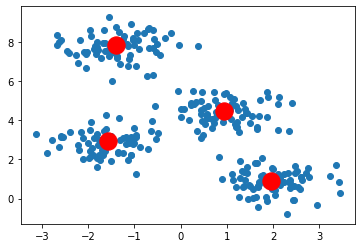

In [0]:
K_meansp(X,4)

Question 4 et 5:

In [0]:
def quality_validate(X,k,centre_new):
  color  = ['red', 'blue', 'green', 'purple','black','turquoise','pink','yellow','orange']
  n = len(color)
  m = centre_new.shape[1]

  for i in range(len(X)):
 
    for j in range(k):
      distance = np.sqrt((X[i][0]-centre_new[j][0])**2 + (X[i][1]-centre_new[j][1])**2)

      if j == 0 : 
        cm = distance
        mini = 0

      else : 

        if cm > distance : 
          cm = distance
          mini = j

    plt.title('KMEANS QUALTITY VALIDATE')
    plt.scatter(X[i,0], X[i,1],c=color[mini%n])

    for i in range(k):
      plt.scatter(centre_new[i,0], centre_new[i,1], s=300, c=color[i%n],edgecolors='white')

  plt.show()

def K_meanspq(X,k):
    n = X.shape[0]
    centre = K_meanspp(X,k)
    centre_old = np.zeros(centre.shape) 
    centre_new = np.copy(centre)
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    error = np.linalg.norm(centre_new - centre_old)
    
    while error != 0:

        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)

        clusters = np.argmin(distances, axis = 1)        
        centre_old = np.copy(centre_new)

        for i in range(k):
            centre_new[i] = np.mean(X[clusters == i], axis=0)

        error = np.linalg.norm(centre_new - centre_old)

    plt.title('KMEANS')
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
    plt.show()

#   Qualité des clusters avec la coloration comme indices 
    quality_validate(X,k,centre_new)

    for i in range(k):
      distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
      
    clusters = np.argmin(distances, axis = 1)
    
    return clusters


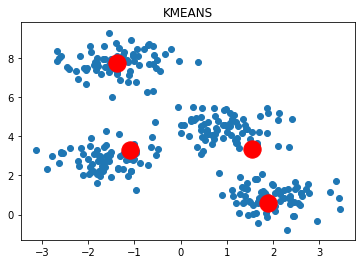

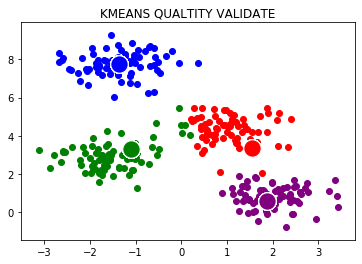

array([0, 1, 0, 1, 0, 3, 2, 0, 1, 1, 2, 1, 0, 1, 3, 2, 0, 3, 2, 2, 0, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 0, 2, 2, 0,
       2, 2, 1, 2, 1, 0, 2, 3, 1, 3, 0, 2, 1, 2, 1, 3, 1, 2, 1, 2, 2, 2,
       1, 3, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 2, 3, 2,
       1, 1, 0, 3, 1, 2, 2, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 0, 3, 0, 1, 2,
       2, 2, 3, 1, 3, 0, 1, 3, 0, 2, 2, 3, 2, 3, 0, 3, 3, 2, 3, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       3, 2, 1, 2, 3, 0, 1, 0, 0, 0, 2, 2, 2, 2, 3, 0, 0, 1, 3, 0, 2, 1,
       0, 0, 0, 2, 3, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 1, 0, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 3, 3, 2,
       1, 3, 3, 2, 3, 2, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 3, 2, 1, 2, 0, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 3, 2, 2, 2, 2, 3, 3, 1, 0, 2, 2, 3,
       1, 2, 0, 1, 2, 0, 3, 2, 2, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 3, 3, 0,
       1, 2, 1, 0, 3, 3, 1, 1, 1, 0, 0, 2, 1, 2])

In [0]:
K_meanspq(X,4)

Question 6 et 7

In [0]:
def Silhouette(X,clusters):
  return metrics.silhouette_score(X, clusters, metric='euclidean')   
    
def protocole(X,k,n):
  for i in range(n):
    c=K_meanspq(X,k)
    b=Silhouette(X,c)
    print('score =',b)


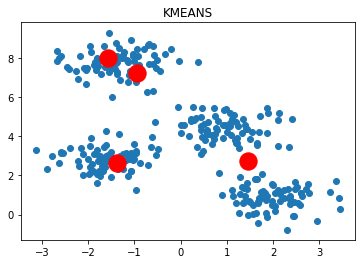

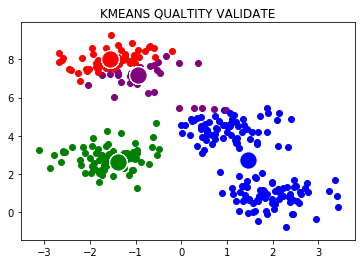

score = 0.3607441142917835


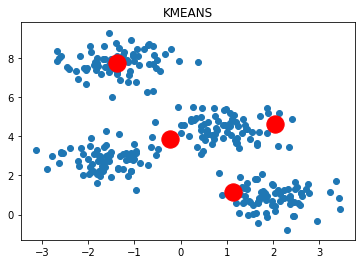

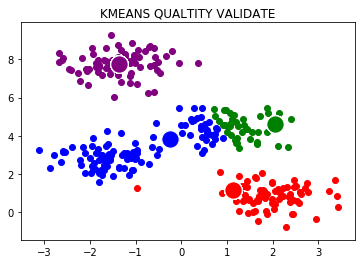

score = 0.37104604324451523


In [0]:
protocole(X,4,2)

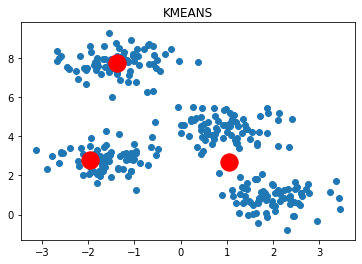

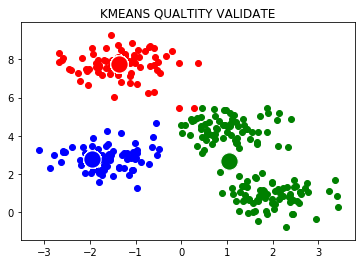

score = 0.4140757663277922


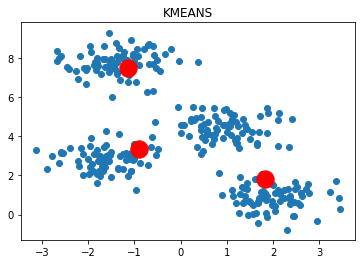

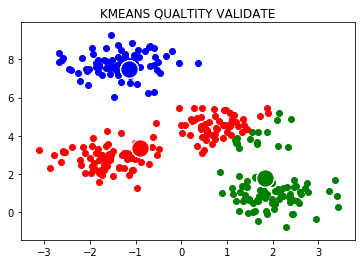

score = 0.4969086716532244


In [0]:
protocole(X,3,2)

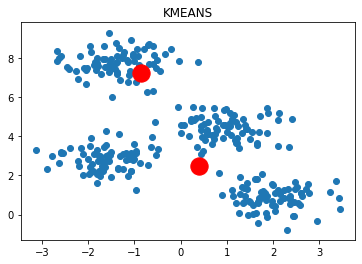

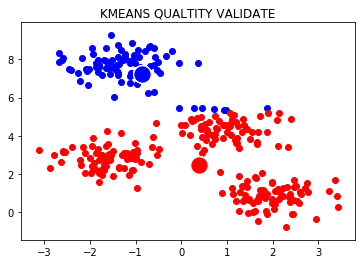

score = 0.48960964673451146


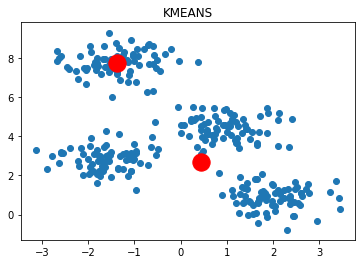

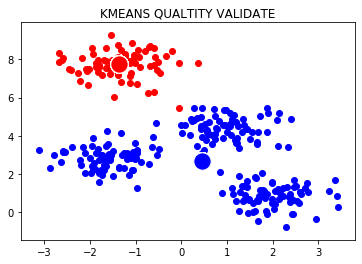

score = 0.54731479631826


In [0]:
protocole(X,2,2)

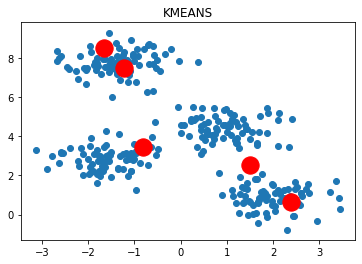

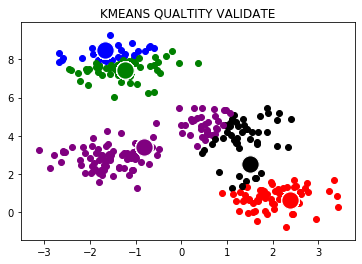

score = 0.2639440162880259


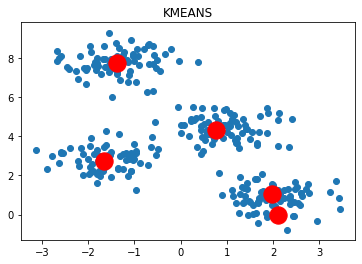

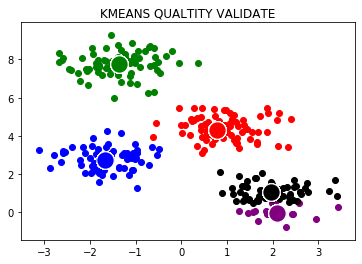

score = 0.5610615555695946


In [0]:
protocole(X,5,2)

On constate que les cluster ne sont pas stable, les zone change d'un appel a l'autre de la fonctions.

Si on change le nombre de cluster, le résultat devien plus ou moins stable:

On voie une différence net entre 2 cluster et 3 dans la stabilité des résultat, une faible différence entre 3 et 4 cluster, et la stabilité semble retomber a 5 cluster.

K-medoïd


Question 1

In [0]:
def K_Medoid(X,k):
    n = X.shape[0]
    c = np.random.randint(X.shape[0],size=k)
    centre = X[c]
    centre_old = np.zeros(centre.shape) 
    centre_new = np.copy(centre)
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    erreur = np.linalg.norm(centre_new - centre_old)
    
    while erreur != 0:

        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)

        clusters = np.argmin(distances, axis = 1)       
        centre_old = np.copy(centre_new)

        for i in range(k):

            centre_new[i] = np.mean(X[clusters == i], axis=0)

        erreur = np.linalg.norm(centre_new - centre_old)
        
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
    plt.show()

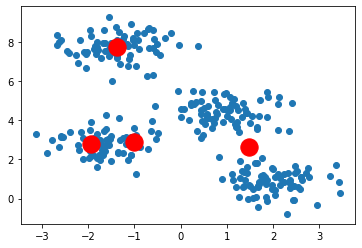

In [0]:
K_Medoid(X,4)

Question 2

In [0]:
def K_medoidspp(X,K):
  i=rd.randint(0,X.shape[0])
  Centroid_temp=np.array([X[i]])

  for k in range(1,K):
      D=np.array([]) 

      for x in X:
          D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))

      prob=D/np.sum(D)
      cummulative_prob=np.cumsum(prob)
      r=rd.random()
      i=0

      for j,p in enumerate(cummulative_prob):

          if r<p:
              i=j
              break

      Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
      
  return Centroid_temp

Question 3

In [0]:
def quality_validateKMD(X,k,centre_new):
  color  = ['red', 'blue', 'green', 'purple','black','turquoise','pink','yellow','orange']
  n = len(color)
  m = centre_new.shape[1]

  for i in range(len(X)):

    for j in range(k):
      distance = np.sqrt((X[i][0]-centre_new[j][0])**2 + (X[i][1]-centre_new[j][1])**2)

      if j == 0 : 
        cm = distance
        mini = 0

      else : 

        if cm > distance : 
          cm = distance
          mini = j

    plt.title('KMEDOID QUALTITY VALIDATE')
    plt.scatter(X[i,0], X[i,1],c=color[mini%n])

    for i in range(k):
      plt.scatter(centre_new[i,0], centre_new[i,1], s=300, c=color[i%n],edgecolors='white')

  plt.show()
  
def K_Medoidpq(X,k):
    n = X.shape[0]
    centre = K_medoidspp(X,k)
    centre_old = np.zeros(centre.shape) 
    centre_new = np.copy(centre)
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    erreur = np.linalg.norm(centre_new - centre_old)
    
    while erreur != 0:

        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)

        clusters = np.argmin(distances, axis = 1)        
        centre_old = np.copy(centre_new)

        for i in range(k):
            centre_new[i] = np.mean(X[clusters == i], axis=0)

        erreur = np.linalg.norm(centre_new - centre_old)

    plt.title('KMEDOID')
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
    plt.show()
#   Qualité des clusters avec la coloration comme indices 
    quality_validateKMD(X,k,centre_new)

    for i in range(k):
      distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
      
    clusters = np.argmin(distances, axis = 1)
    
    return clusters

Question 4

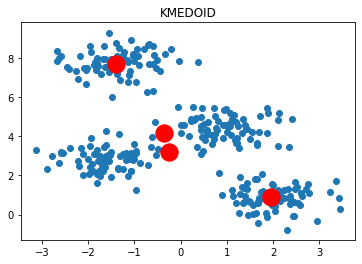

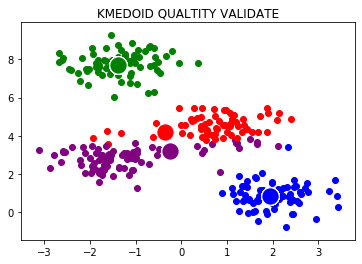

array([1, 2, 0, 2, 1, 1, 3, 3, 2, 2, 3, 2, 3, 2, 1, 3, 0, 1, 3, 3, 1, 1,
       0, 0, 3, 0, 1, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 3, 3, 0, 3,
       3, 3, 2, 3, 2, 1, 0, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 0, 3,
       2, 1, 2, 0, 3, 3, 2, 0, 3, 2, 0, 0, 1, 2, 1, 3, 1, 1, 2, 0, 1, 0,
       2, 2, 3, 1, 2, 0, 3, 3, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 0, 1, 2, 1, 3, 2, 1, 1, 0, 3, 1, 0, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 0, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 3, 3, 1, 0, 0, 1, 0, 1, 3, 3, 2, 1, 0, 0, 2,
       1, 1, 3, 3, 1, 3, 0, 0, 0, 3, 0, 0, 1, 2, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 2, 3, 3, 1, 3, 3, 2, 3, 2, 0, 2, 3, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 0, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 0, 3, 2, 3, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       2, 3, 3, 2, 0, 1, 1, 0, 3, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 3, 2, 3, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3])

In [0]:
K_Medoidpq(X,4)

Question 5

In [0]:
def protocole2(X,k,n):
  for i in range(n):
    c=K_Medoidpq(X,k)
    b=Silhouette(X,c)
    print('score =',b)

def test_qualité(X,k,n):
  #on test les donné X n fois de 2 a k cluster
  for j in range (2,k+1):
    print("=====================================\n=====================================")
    print("Nombre de cluster =",j)
    print("K Mean:")
    protocole(X,j,n)
    print("\nK medoid:")
    protocole2(X,j,n)
    

Nombre de cluster = 2
K Mean:


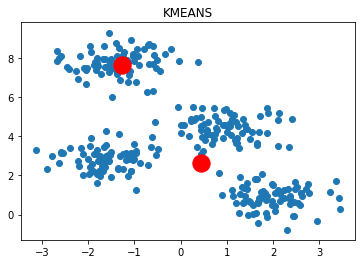

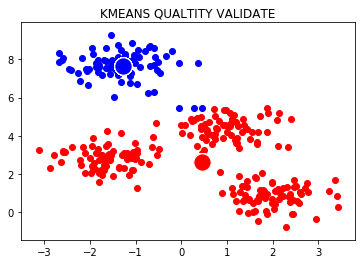

score = 0.5361802334998136


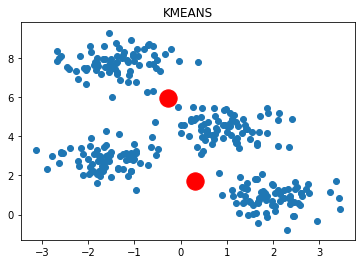

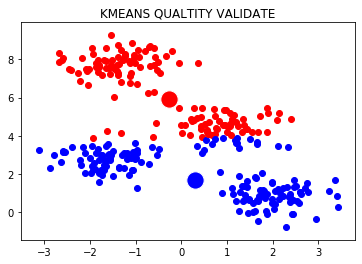

score = 0.41583040681652533


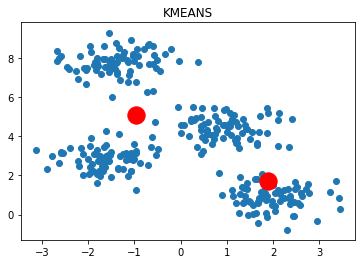

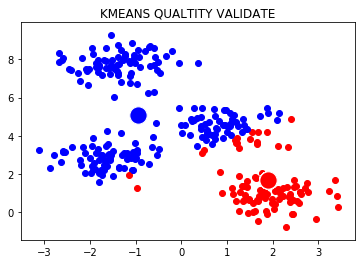

score = 0.4066584605887543

K medoid:


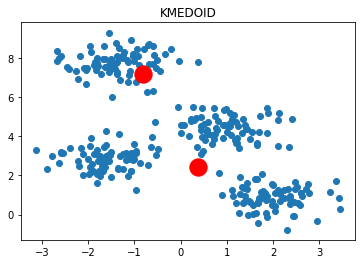

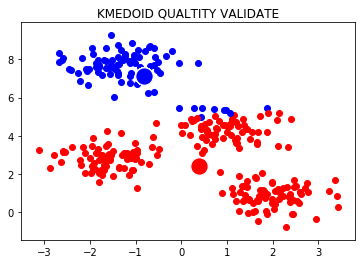

score = 0.4820898662212704


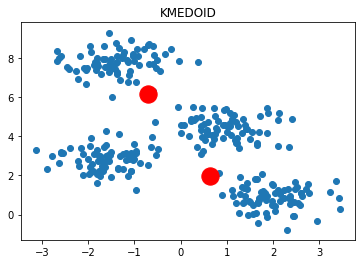

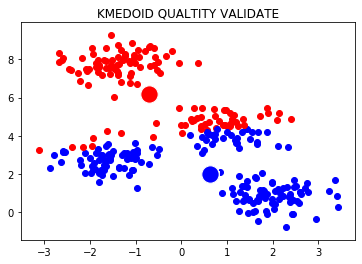

score = 0.4009828074342292


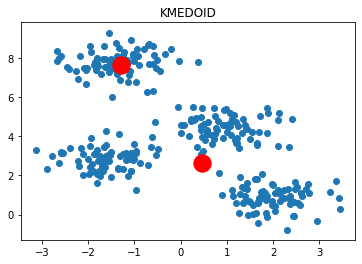

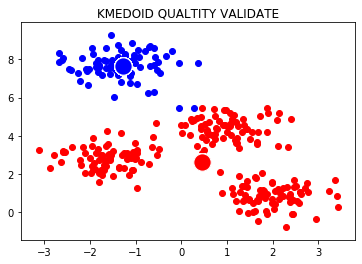

score = 0.5368997825085733
Nombre de cluster = 3
K Mean:


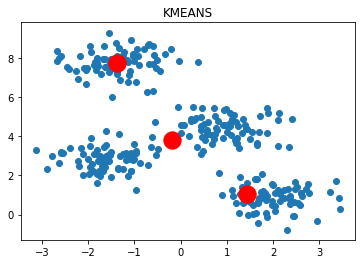

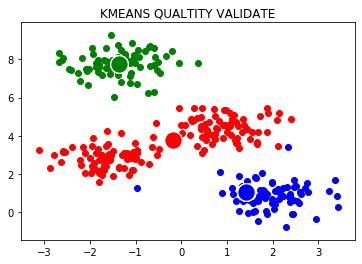

score = 0.5286351004958771


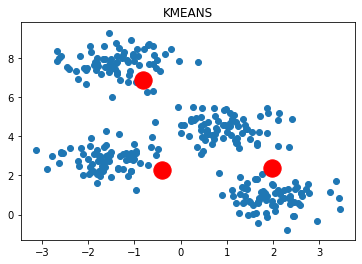

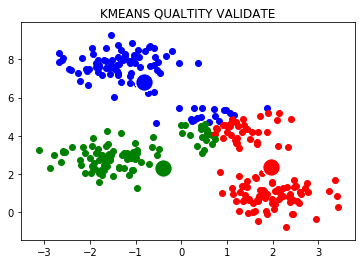

score = 0.3338777225382387


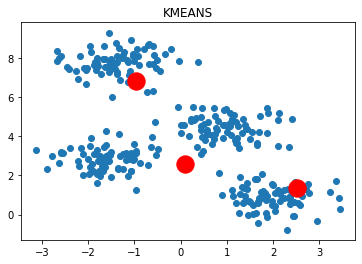

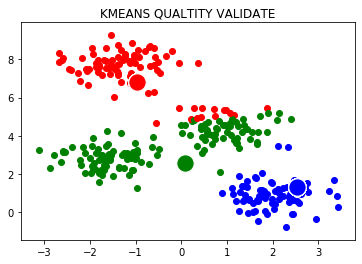

score = 0.29715366696182977

K medoid:


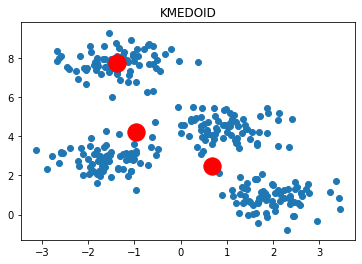

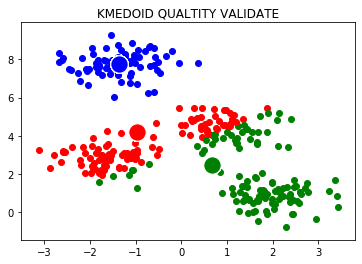

score = 0.2640612213090529


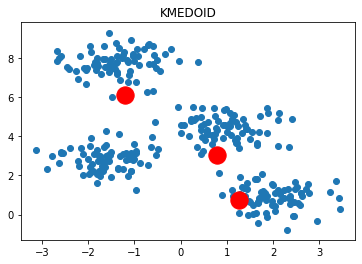

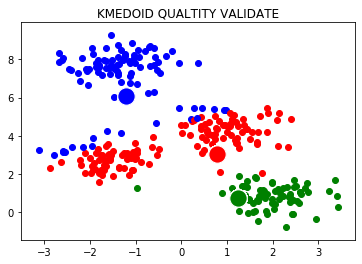

score = 0.25099594697543426


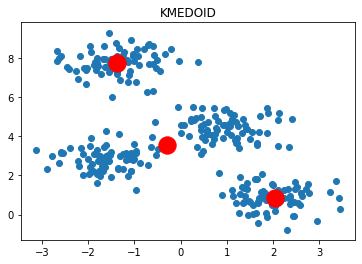

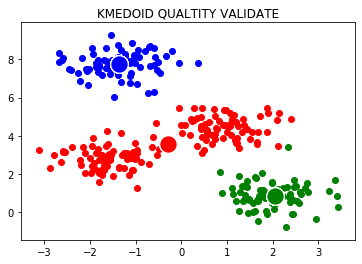

score = 0.5766031864435216
Nombre de cluster = 4
K Mean:


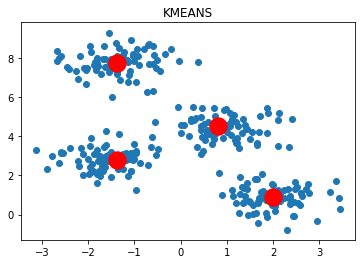

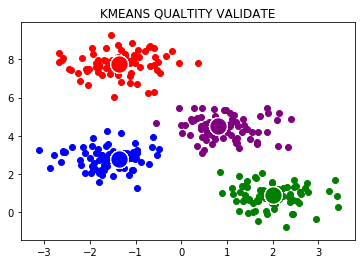

score = 0.6375064452913012


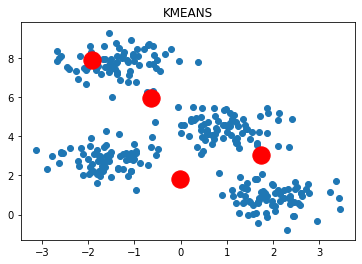

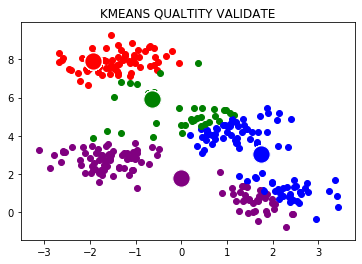

score = 0.15040449037211523


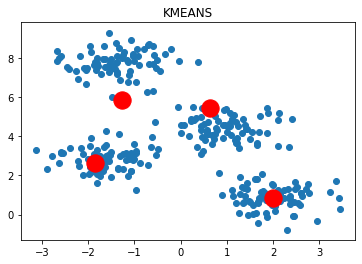

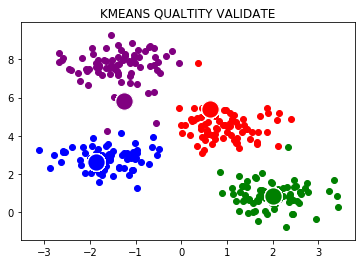

score = 0.37716394586938823

K medoid:


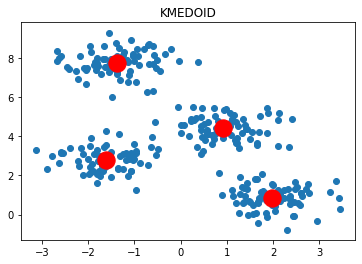

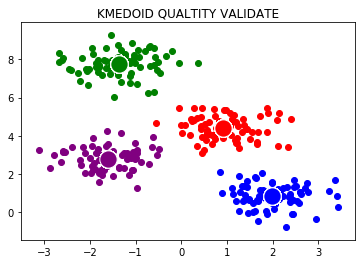

score = 0.6787131269195417


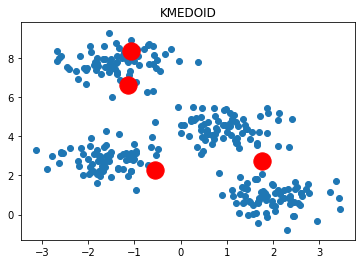

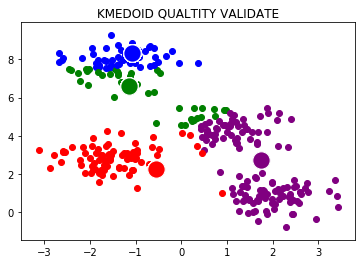

score = 0.22095264040399148


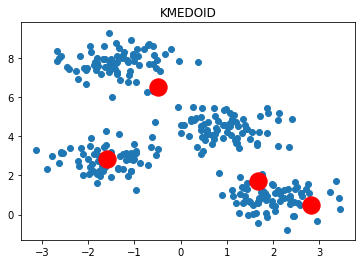

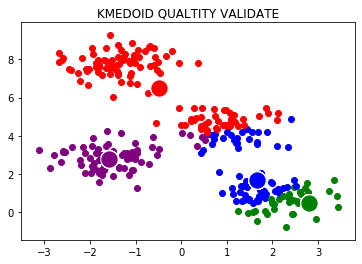

score = 0.3494210498562793
Nombre de cluster = 5
K Mean:


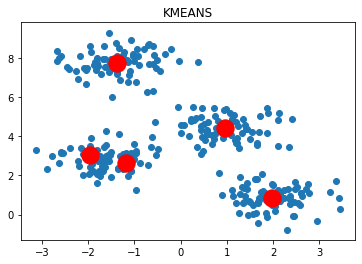

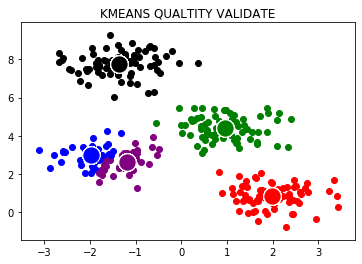

score = 0.5761989028996711


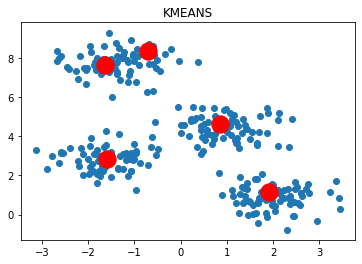

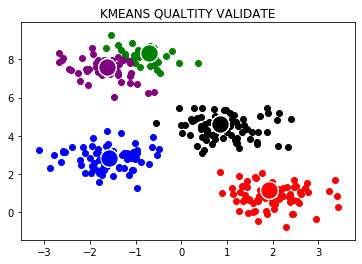

score = 0.5479504355167474


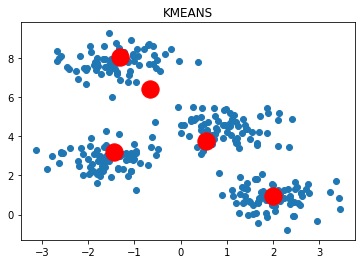

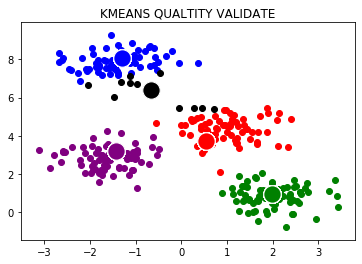

score = 0.4005753943574508

K medoid:


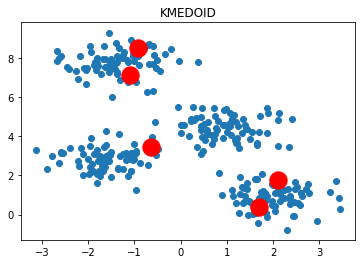

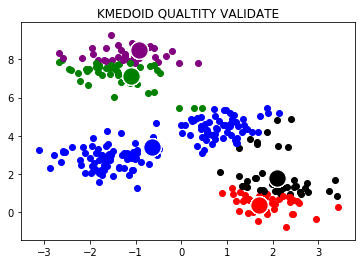

score = 0.25547366981386177


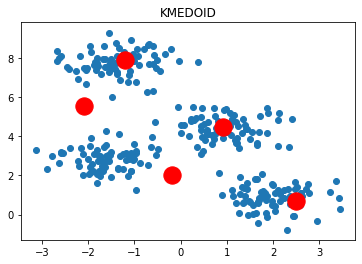

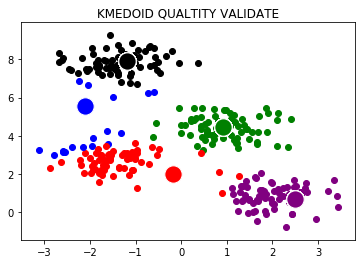

score = 0.3340325818052482


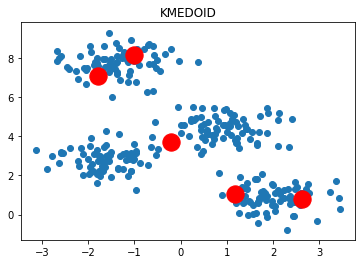

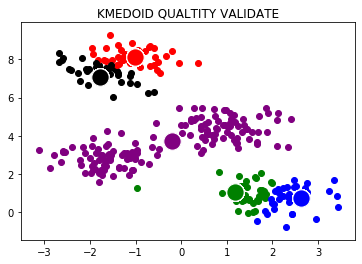

score = 0.3048189904597376


In [0]:
test_qualité(X,5,3)

**Discussion**

Si on se fie au résultat au dessu la méthode K-mean sembler plus fiable pour separer les clusters, mais est moins stable que k-medoid qui semble garder ses centroïd dans une zone assez proche.

Dans ce qui s'affiche ici les différence de score ne semble pas assez significatif.

La stabilité de K medoid pourrais s'expliquer par le fait que les points sont selection parmis les points du jeu de donnée.

On pourrais expliquer les meilleurs cluster de K means par la méthode k-mean++